<a href="https://colab.research.google.com/github/ArnavBhatia68/MAT-421-HW/blob/main/ModuleG_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

HW9 – Arnav Bhatia

Course: MAT421

Date: 3/12




21.4 Simpson’s Rule

Simpson’s Rule approximates the integral of a function by fitting quadratic polynomials through groups of three consecutive points.
To use Simpson’s rule, the number of subintervals must be even (which implies an odd number of grid points).

For each pair of subintervals [x_i−1, x_i] and [x_i, x_i+1], Simpson’s Rule gives:


I_simp ≈ (h/3) * ( f(x_0) + 2∑[i even, i=2 to n−2] f(x_i) + 4∑[i odd, i=1 to n−1] f(x_i) + f(x_n−1) )


Below is an example that approximates the integral of sin(x) from 0 to 2π.
Since the exact value is 0, the Simpson’s approximation error should be nearly zero.


In [9]:
import numpy as np

a = 0
b = 2 * np.pi
n = 11
h = (b - a) / (n - 1)


x = np.linspace(a, b, n)
f = np.sin(x)


I_simp = (h / 3) * (f[0] +
                    2 * np.sum(f[2:n-1:2]) +
                    4 * np.sum(f[1:n:2]) +
                    f[-1])

# The exact valu is 0.
err_simp = 0 - I_simp

print("Simpson's approximation:", I_simp)
print("Simpson's approximation error:", err_simp)


Simpson's approximation: 8.821685475443087e-17
Simpson's approximation error: -8.821685475443087e-17


After running this cell, we see a Simpson’s approximation very close to 0
(with an error on the order of 10⁻¹⁷), which indicates that Simpson’s Rule is accurately approximating the integral.


21.5 Computing Integrals in Python

Python offers convenient libraries for numerical integration. In the example below, we approximate the integral of
sin(x) over [0,2π] (which is exactly 0) using:

- Trapezoidal Rule: via NumPy's trapz function and a manual implementation.
- Quad Integration: using SciPy's quad function.



Trapezoidal Rule (np.trapz): 1.6653345369377348e-16
Trapezoidal Rule (manual): -7.694682774887159e-17
Trapezoidal Rule Error (manual): 7.694682774887159e-17
Quad Integration Result: 2.221501482512777e-16
Quad Estimated Error: 4.3998892617845996e-14
Quad Integration Error: -2.221501482512777e-16


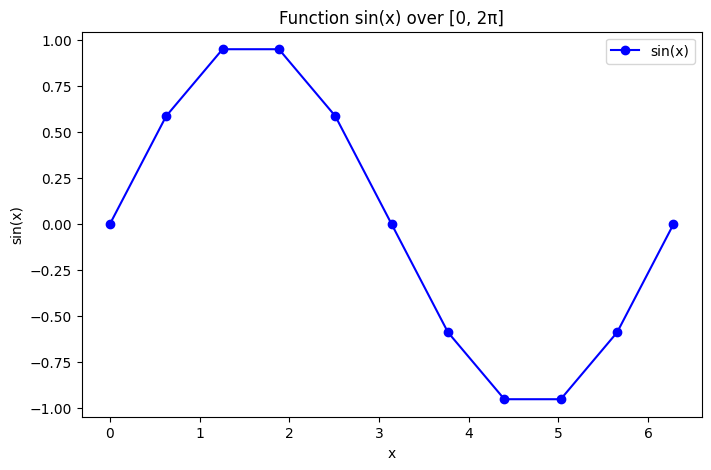

In [10]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.integrate import quad

a = 0
b = 2 * np.pi
n = 11
h = (b - a) / (n - 1)
x = np.linspace(a, b, n)
f = np.sin(x)


I_trapz = np.trapz(f, x)

I_trap_manual = (h / 2) * (f[0] + 2 * np.sum(f[1:-1]) + f[-1])
err_trap = 0 - I_trap_manual

print("Trapezoidal Rule (np.trapz):", I_trapz)
print("Trapezoidal Rule (manual):", I_trap_manual)
print("Trapezoidal Rule Error (manual):", err_trap)


I_quad, est_err_quad = quad(np.sin, a, b)
err_quad = 0 - I_quad

print("Quad Integration Result:", I_quad)
print("Quad Estimated Error:", est_err_quad)
print("Quad Integration Error:", err_quad)

plt.figure(figsize=(8, 5))
plt.plot(x, f, 'bo-', label='sin(x)')
plt.title("Function sin(x) over [0, 2π]")
plt.xlabel("x")
plt.ylabel("sin(x)")
plt.legend()
plt.show()
